In [1]:
import re
from operator import add

In [13]:
file_in = sc.textFile("/home/carl/spark/NOTICE")

In [3]:
words = file_in.flatMap(lambda line: re.split(' ', line.lower().strip()))

In [4]:
words = words.filter(lambda w: len(w) > 3)

In [5]:
words = words.map(lambda w:(w,1))

In [6]:
words = words.reduceByKey(add)

In [7]:
words = words.map(lambda x: (x[1], x[0])).sortByKey(False)

In [8]:
words.take(15)

[(79, u'apache'),
 (66, u'copyright'),
 (60, u'software'),
 (54, u'this'),
 (44, u'license'),
 (38, u'product'),
 (35, u'foundation'),
 (28, u'under'),
 (19, u'developed'),
 (18, u'includes'),
 (17, u'from'),
 (16, u'version'),
 (15, u'commons'),
 (15, u'distributed'),
 (14, u'project')]

In [9]:
% matplotlib inline
import matplotlib.pyplot as plt

def histogram(words):
    count = map(lambda x: x[1], words)
    word = map(lambda x:x[0], words)
    plt.barh(range(len(count)), count, color="green")
    plt.yticks(range(len(count)), word)

In [10]:
words = words.map(lambda x:(x[1], x[0]))

In [11]:
words.take(15)

[(u'apache', 79),
 (u'copyright', 66),
 (u'software', 60),
 (u'this', 54),
 (u'license', 44),
 (u'product', 38),
 (u'foundation', 35),
 (u'under', 28),
 (u'developed', 19),
 (u'includes', 18),
 (u'from', 17),
 (u'version', 16),
 (u'commons', 15),
 (u'distributed', 15),
 (u'project', 14)]

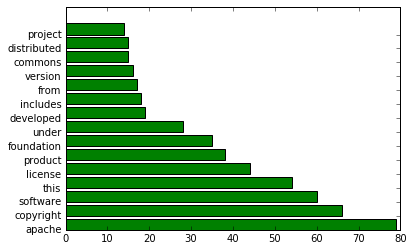

In [12]:
histogram(words.take(15))